### 1. Exploratory Data Analysis (EDA)

範例資料集 : Kaggle 's pima-indians-diabetes.csv

https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/version/1#_=_

Field | 中文說明
---|---
Pregnancies |懷孕次數
Glucose |口服葡萄糖實驗中2小時後的血漿葡萄糖濃度
BloodPressure |舒張壓, 單位 : mmHg
SkinThickness |肱三頭肌皮膚褶皺厚度, 單位 : mm
Insulin |餐後血清胰島素
BMI |體重指數 BMI
DiabetesPedigreeFunction | 糖尿病譜系功能
Age | 年齡 
Outcome |類別變量（1：糖尿病檢測陽性，0：糖尿病檢測陰性）

In [1]:
# 引入套件
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 讀取資料

data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 查看各個變數分布與標籤關係

Outcome
0    500
1    268
dtype: int64

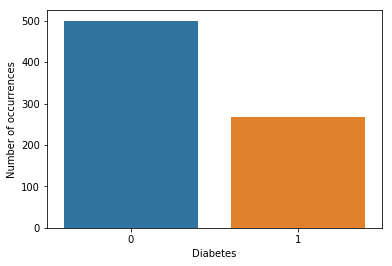

In [40]:
#透過直方圖了解疾病分類情況
sns.countplot(data['Outcome'])
plt.xlabel('Diabetes')
plt.ylabel('Number of occurrences')
data.groupby("Outcome").size()

Text(0, 0.5, 'Number of occurrences')

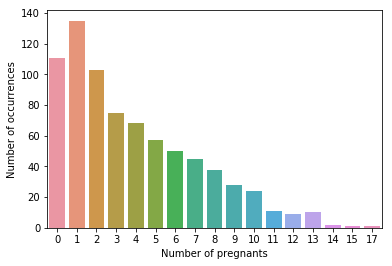

In [39]:
#透過直方圖了解懷孕次數分布情況
fig = plt.figure()
### Number of occurrences
sns.countplot(data['Pregnancies'])
plt.xlabel('Number of pregnants')
plt.ylabel('Number of occurrences')

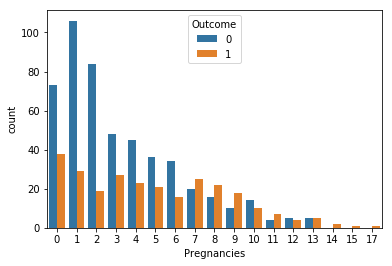

In [9]:
sns.countplot(x="Pregnancies", hue="Outcome",data=data)

Text(0, 0.5, 'Number of occurrences')

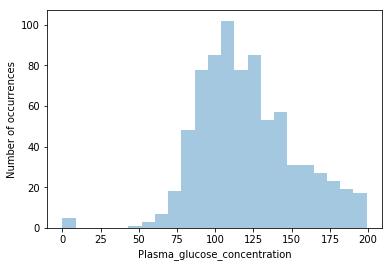

In [10]:
fig = plt.figure()
sns.distplot(data.Glucose, kde = False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of occurrences')

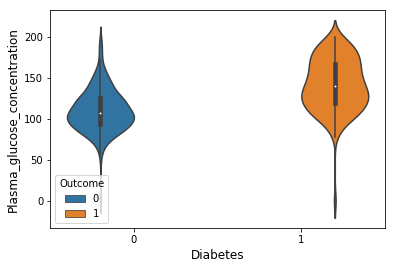

In [11]:
sns.violinplot(x='Outcome', y='Glucose', data=data, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

Text(0, 0.5, 'frequency')

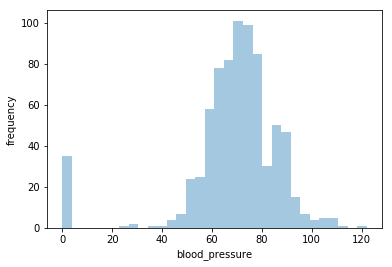

In [12]:
fig = plt.figure()
sns.distplot(data.BloodPressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')

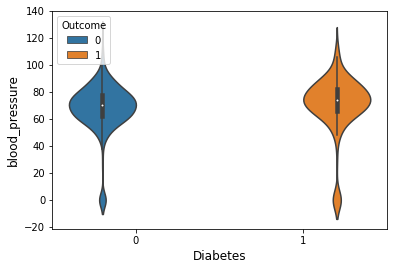

In [13]:
sns.violinplot(x='Outcome', y='BloodPressure', data=data, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('blood_pressure', fontsize=12)
plt.show()

In [ ]:
##### 變數之間特徵關聯性

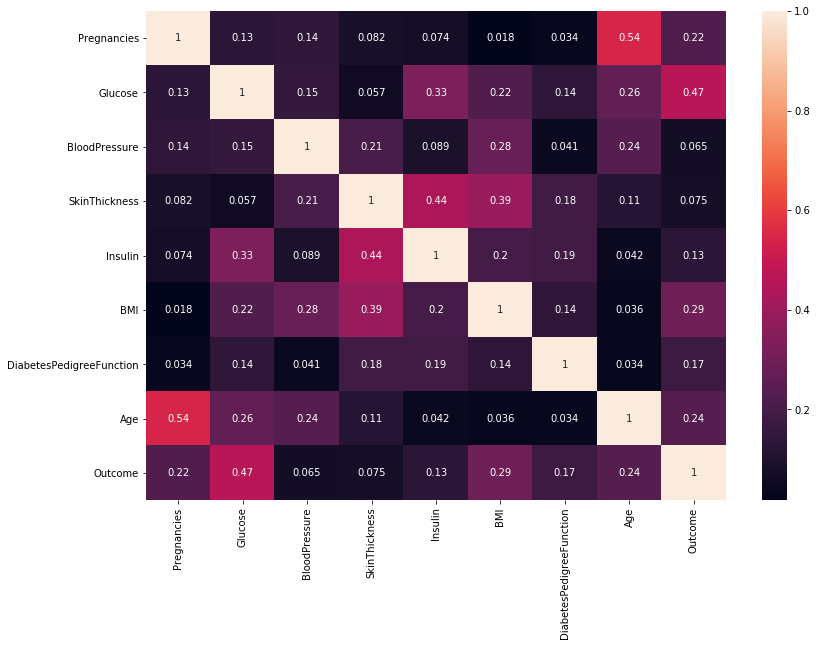

In [15]:
data_corr = data.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

### 進行資料預處理　（Data Preprocessing)

In [16]:
(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### 缺失值處理(Missing data)
* 丟棄 (PS. 如資料量夠多)
* 補值 : 定值0、平均數、眾數、中位數

In [17]:
# 計算 血漿葡萄糖濃度 平均值,眾數,中位數
#平均值
plasMean =round(data['Glucose'].mean())

print("血漿葡萄糖濃度-平均值 : %d" %(plasMean))

#眾數
plasMode =round(data['Glucose'].mode())
print("血漿葡萄糖濃度-眾數 : %d " %(plasMode[0]))

#中位數
plasMedian =round(data['Glucose'].median())
print("血漿葡萄糖濃度-中位數 : %d " %(plasMedian))

血漿葡萄糖濃度-平均值 : 121
血漿葡萄糖濃度-眾數 : 99 
血漿葡萄糖濃度-中位數 : 117 


In [19]:
# 計算 舒張壓 平均值,眾數,中位數
#平均值
presMean =round(data['BloodPressure'].mean())

print("舒張壓-平均值 : %d" %(presMean))

#眾數
presMode =round(data['BloodPressure'].mode())
print("舒張壓-眾數 : %d " %(presMode[0]))

#中位數
presMedian =round(data['BloodPressure'].median())
print("舒張壓-中位數 : %d " %(presMedian))

舒張壓-平均值 : 69
舒張壓-眾數 : 70 
舒張壓-中位數 : 72 


In [20]:
# 計算 皮膚褶皺厚度 平均值,眾數,中位數
#平均值
skinMean =round(data['SkinThickness'].mean())

print("皮膚褶皺厚度-平均值 : %d" %(skinMean))

#眾數
skinMode =round(data['SkinThickness'].mode())
print("皮膚褶皺厚度-眾數 : %d " %(skinMode[0]))

#中位數
skinMedian =round(data['SkinThickness'].median())
print("皮膚褶皺厚度-中位數 : %d " %(skinMedian))

皮膚褶皺厚度-平均值 : 21
皮膚褶皺厚度-眾數 : 0 
皮膚褶皺厚度-中位數 : 23 


In [21]:
# 計算 胰島素 平均值,眾數,中位數
#平均值
InsulinMean =round(data['Insulin'].mean())

print("胰島素-平均值 : %d" %(InsulinMean))

#眾數
InsulinMode =round(data['Insulin'].mode())
print("胰島素-眾數 : %d " %(InsulinMode[0]))

#中位數
InsulinMedian =round(data['Insulin'].median())
print("胰島素-中位數 : %d " %(InsulinMedian ))

胰島素-平均值 : 80
胰島素-眾數 : 0 
胰島素-中位數 : 30 


In [22]:
# 計算 BMI 平均值,眾數,中位數
#平均值
BMIMean =round(data['BMI'].mean())

print("BMI-平均值 : %d" %(BMIMean))

#眾數
BMIMode =round(data['BMI'].mode())
print("BMI-眾數 : %d " %(BMIMode[0]))

#中位數
BMIMedian =round(data['BMI'].median())
print("BMI-中位數 : %d " %(BMIMedian))

BMI-平均值 : 32
BMI-眾數 : 32 
BMI-中位數 : 32 


In [23]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# 以各變數平均值替代NaN

data['Glucose'] = data['Glucose'].fillna(plasMean)
data['BloodPressure'] = data['Glucose'].fillna(presMean)
data['SkinThickness'] = data['SkinThickness'].fillna(skinMean)
data['Insulin'] = data['Insulin'].fillna(InsulinMean)
data['BMI'] = data['BMI'].fillna(BMIMean)

In [26]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
X = data.iloc[:,0:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,148.0,35.0,80.0,33.6,0.627,50
1,1,85.0,85.0,29.0,80.0,26.6,0.351,31
2,8,183.0,183.0,21.0,80.0,23.3,0.672,32
3,1,89.0,89.0,23.0,94.0,28.1,0.167,21
4,0,137.0,137.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,101.0,48.0,180.0,32.9,0.171,63
764,2,122.0,122.0,27.0,80.0,36.8,0.340,27
765,5,121.0,121.0,23.0,112.0,26.2,0.245,30
766,1,126.0,126.0,21.0,80.0,30.1,0.349,47


In [28]:
Y =data.iloc[:,8]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test , y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [31]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [32]:
print(y_train.shape)
print(y_test.shape)

(614,)
(154,)


## KNN - K Nearest Neighbor (K-近郊演算法) 
* 監督式學習
* 適用於分類問題 & 迴歸預測 問題

#### 優點
* 對異常值有較高的容忍度

#### 缺點
* 計算量較大, 對記憶體需求較高
* 每次對一個未標記樣本進行分類時,需要全部計算一遍距離

![Alt text](data/KNN.jpg)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
test_score = model.score(X_test,y_test)
test_score

0.7077922077922078

In [36]:
train_score = model.score(X_train,y_train)
train_score

0.8224755700325733

In [37]:
# 預測新數據
x = model.predict([[6,148,72,35,0,33.6,0.627,50]])
print(x[0])

0


In [38]:
model.predict(X_test)

import collections
collections.Counter(model.predict(X_test))

Counter({0: 98, 1: 56})